In [3]:
# 토픽모델링
# 맥락과 관련 단어들을 이용하여 주제를 찾아내는 알고리즘
# 단어구름, 단어네트워크, 쿨 토픽트렌드

In [5]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.tokenize import RegexpTokenizer

In [6]:
tokenizer = RegexpTokenizer('[\w]+') # 토큰화 - 단어별로 자른다

In [7]:
stop_words = stopwords.words('english') # 불용어 제거

In [8]:
p_stemmer = PorterStemmer() # 어근 추출

In [9]:
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health."
doc_f = "Big data is a term used to refer to data sets that are too large or complex for traditional data-processing application software to adequately deal with."
doc_g = "Data with many cases offer greater statistical power, while data with higher complexity may lead to a higher false discovery rate"
doc_h = "Big data was originally associated with three key concepts: volume, variety, and velocity."
doc_i = "A 2016 definition states that 'Big data represents the information assets characterized by such a high volume, velocity and variety to require specific technology and analytical methods for its transformation into value'."
doc_j = "Data must be processed with advanced tools to reveal meaningful information."

In [10]:
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e, doc_f, doc_g, doc_h, doc_i, doc_j]

In [11]:
texts = []

In [12]:
for w in doc_set:
    raw = w.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in stop_words]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)

In [14]:
print(texts)

[['brocolli', 'good', 'eat', 'brother', 'like', 'eat', 'good', 'brocolli', 'mother'], ['mother', 'spend', 'lot', 'time', 'drive', 'brother', 'around', 'basebal', 'practic'], ['health', 'expert', 'suggest', 'drive', 'may', 'caus', 'increas', 'tension', 'blood', 'pressur'], ['often', 'feel', 'pressur', 'perform', 'well', 'school', 'mother', 'never', 'seem', 'drive', 'brother', 'better'], ['health', 'profession', 'say', 'brocolli', 'good', 'health'], ['big', 'data', 'term', 'use', 'refer', 'data', 'set', 'larg', 'complex', 'tradit', 'data', 'process', 'applic', 'softwar', 'adequ', 'deal'], ['data', 'mani', 'case', 'offer', 'greater', 'statist', 'power', 'data', 'higher', 'complex', 'may', 'lead', 'higher', 'fals', 'discoveri', 'rate'], ['big', 'data', 'origin', 'associ', 'three', 'key', 'concept', 'volum', 'varieti', 'veloc'], ['2016', 'definit', 'state', 'big', 'data', 'repres', 'inform', 'asset', 'character', 'high', 'volum', 'veloc', 'varieti', 'requir', 'specif', 'technolog', 'analyt'

In [15]:
dictionary = corpora.Dictionary(texts)
dictionary

In [17]:
corpus = [dictionary.doc2bow(text) for text in texts]  # word2bow - bag of words (bow)
corpus

[[(0, 2), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1)],
 [(1, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(8, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1)],
 [(1, 1),
  (5, 1),
  (8, 1),
  (19, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1)],
 [(0, 1), (3, 1), (16, 2), (30, 1), (31, 1)],
 [(32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 3),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1)],
 [(18, 1),
  (35, 1),
  (36, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 2),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1)],
 [(34, 1),
  (36, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(34, 1),
  (36, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),

In [20]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary)

In [21]:
ldamodel.print_topics(num_words=7)  # 토픽별 단어 가중치

[(0,
  '0.038*"big" + 0.036*"volum" + 0.036*"data" + 0.036*"veloc" + 0.035*"varieti" + 0.023*"transform" + 0.023*"state"'),
 (1,
  '0.047*"brocolli" + 0.045*"good" + 0.038*"mother" + 0.038*"brother" + 0.038*"eat" + 0.034*"drive" + 0.034*"pressur"'),
 (2,
  '0.076*"data" + 0.026*"process" + 0.026*"complex" + 0.025*"higher" + 0.020*"health" + 0.019*"may" + 0.019*"big"')]

In [33]:
ldamodel.get_document_topics(corpus)[5]

[(0, 0.95911664), (1, 0.02086403), (2, 0.020019319)]

In [23]:
ldamodel.get_document_topics(corpus)[7]

[(0, 0.9366739), (1, 0.030526204), (2, 0.032799944)]

In [35]:
# from gensim.corpora import Dictionary
# corpus = [['man','female'],['woman','boy']]
# dct = Dictionary(corpus)
# dct.doc2idx(['man','woman','boy','female'])

In [ ]:
# LDA 토픽 개수 지정
# perplexity(혼란도) - 상위 단어 간의 유사도를 계산하여 평균, 해당 주제가 의미론적으로 일치하는 단어들끼리 모여있는지
# coherence

In [24]:
from gensim.models import CoherenceModel

print('\nPerplexity: ', ldamodel.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary,topn=10)
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -4.895329067419315

Coherence Score:  0.5512520238147426


Text(0, 0.5, 'Perplexity score')

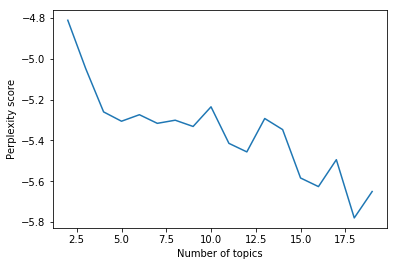

In [28]:
import matplotlib.pyplot as plt

perplexity_values = []
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

x = range(2,20)
plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
# plt.show()

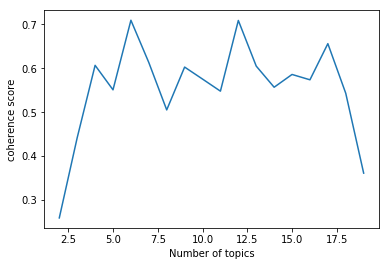

In [29]:
coherence_values = []
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary,topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

x = range(2,20)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("coherence score")
plt.show()